In [10]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scienceplots as sp
import seaborn as sns

# from torch.sparse import to_sparse_semi_structured

column_width = 3.5

with plt.style.context(['science']):
    sci_cycle = plt.rcParams['axes.prop_cycle']

# Activation Visualizations

In [11]:
import torch
import torch.nn as nn

In [12]:
from models import cifar100_vit
from data.cifar import cifar100
from utils import ActivationSparsity, ActivationInspector, HooksManager, get_device, replace_gelu_with_relu
# from train import evaluate, get_meters

In [13]:
dense_model = cifar100_vit(pretrained=False)
replace_gelu_with_relu(dense_model)

checkpoint_path = './fine_tune_runs/May02_18-38-11_korn.ics.uci.edu_cifar100_vit_cifar100_5e-06/weights/last.pt'
unstructured_checkpoint = torch.load(checkpoint_path, map_location='cpu')
unstructured_model = cifar100_vit(pretrained=False)
unstructured_model.load_state_dict(unstructured_checkpoint['params'])
replace_gelu_with_relu(unstructured_model)

checkpoint_path = './fine_tune_runs/May04_03-08-28_korn.ics.uci.edu_cifar100_vit_cifar100_0.1_semi-structured/weights/last.pt'
semi_checkpoint = torch.load(checkpoint_path, map_location='cpu')
semi_model = cifar100_vit(pretrained=False)
semi_model.load_state_dict(semi_checkpoint['params'])
replace_gelu_with_relu(semi_model)

In [14]:
train_loader, val_loader = cifar100()

Files already downloaded and verified
Files already downloaded and verified


In [15]:
dense_hooks = HooksManager(dense_model, 'cifar100_vit')
unstructured_hooks = HooksManager(unstructured_model, 'cifar100_vit')
semi_hooks = HooksManager(semi_model, 'cifar100_vit')

sparsity_results = torch.load('./results/sparsities_activations.pt')
dense_sparsity = sparsity_results['dense_sparsity']
unstructured_sparsity = sparsity_results['unstructured_sparsity']
semi_sparsity = sparsity_results['semistructured_sparsity']

dense_activations = ActivationInspector()
unstructured_activations = ActivationInspector()
semi_activations = ActivationInspector()

In [16]:
dense_sparsity = {key: val for key, val in dense_sparsity.items() if key.endswith('relu')}
unstructured_sparsity = {key: val for key, val in unstructured_sparsity.items() if key.endswith('relu')}
semi_sparsity = {key: val for key, val in semi_sparsity.items() if key.endswith('relu')}

In [17]:
dense_sparsity, semi_sparsity, unstructured_sparsity

({'enc.0.mlp.1_relu': 0.5027231574058533,
  'enc.0.mlp.4_relu': 0.5162982940673828,
  'enc.1.mlp.1_relu': 0.5014520883560181,
  'enc.1.mlp.4_relu': 0.5031278729438782,
  'enc.2.mlp.1_relu': 0.5029017329216003,
  'enc.2.mlp.4_relu': 0.502247154712677,
  'enc.3.mlp.1_relu': 0.503372073173523,
  'enc.3.mlp.4_relu': 0.4877689480781555,
  'enc.4.mlp.1_relu': 0.5092391967773438,
  'enc.4.mlp.4_relu': 0.5204368829727173,
  'enc.5.mlp.1_relu': 0.4963768422603607,
  'enc.5.mlp.4_relu': 0.5149640440940857,
  'enc.6.mlp.1_relu': 0.5034810304641724,
  'enc.6.mlp.4_relu': 0.48458585143089294},
 {'enc.0.mlp.1_relu': 0.8214554786682129,
  'enc.0.mlp.4_relu': 0.8052064180374146,
  'enc.1.mlp.1_relu': 0.978206992149353,
  'enc.1.mlp.4_relu': 0.9491105079650879,
  'enc.2.mlp.1_relu': 1.0,
  'enc.2.mlp.4_relu': 0.9557291865348816,
  'enc.3.mlp.1_relu': 0.9959589242935181,
  'enc.3.mlp.4_relu': 0.9878466725349426,
  'enc.4.mlp.1_relu': 0.9991717338562012,
  'enc.4.mlp.4_relu': 0.9942675828933716,
  'enc.5

In [19]:
a = sorted([(key, val) for key, val in semi_sparsity.items()], key=lambda x: x[1], reverse=True)
a

[('enc.2.mlp.1_relu', 1.0),
 ('enc.4.mlp.1_relu', 0.9991717338562012),
 ('enc.3.mlp.1_relu', 0.9959589242935181),
 ('enc.4.mlp.4_relu', 0.9942675828933716),
 ('enc.6.mlp.4_relu', 0.9942334890365601),
 ('enc.5.mlp.1_relu', 0.9887669682502747),
 ('enc.3.mlp.4_relu', 0.9878466725349426),
 ('enc.1.mlp.1_relu', 0.978206992149353),
 ('enc.5.mlp.4_relu', 0.9769881367683411),
 ('enc.6.mlp.1_relu', 0.9564260244369507),
 ('enc.2.mlp.4_relu', 0.9557291865348816),
 ('enc.1.mlp.4_relu', 0.9491105079650879),
 ('enc.0.mlp.1_relu', 0.8214554786682129),
 ('enc.0.mlp.4_relu', 0.8052064180374146)]

In [20]:
a = sorted([(key, val) for key, val in unstructured_sparsity.items()], key=lambda x: x[1], reverse=True)
a

[('enc.2.mlp.4_relu', 1.0),
 ('enc.3.mlp.1_relu', 0.9991357922554016),
 ('enc.4.mlp.1_relu', 0.9987667202949524),
 ('enc.5.mlp.1_relu', 0.9974502325057983),
 ('enc.4.mlp.4_relu', 0.9821456074714661),
 ('enc.2.mlp.1_relu', 0.9765625),
 ('enc.3.mlp.4_relu', 0.9697141647338867),
 ('enc.5.mlp.4_relu', 0.9395812153816223),
 ('enc.6.mlp.4_relu', 0.9269372820854187),
 ('enc.1.mlp.1_relu', 0.9023324251174927),
 ('enc.6.mlp.1_relu', 0.8737667798995972),
 ('enc.0.mlp.4_relu', 0.7099279165267944),
 ('enc.0.mlp.1_relu', 0.6588380932807922),
 ('enc.1.mlp.4_relu', 0.5997601747512817)]

In [11]:
val_meters_unstructured = get_meters('cpu', 'val', 100)
val_meters_semi = get_meters('cpu', 'val', 100)

In [12]:
# evaluate(unstructured_model, nn.CrossEntropyLoss(), val_loader, 'cpu', 0, val_meters_unstructured)
# evaluate(semi_model, nn.CrossEntropyLoss(), val_loader, 'cpu', 0, val_meters_semi)

In [13]:
# val_meters_unstructured['top1_accuracy'].compute(), val_meters_semi['top1_accuracy'].compute()
# (tensor(0.5748), tensor(0.5760))

In [14]:
dense_hooks.register_hooks(dense_activations.store_activations)
unstructured_hooks.register_hooks(unstructured_activations.store_activations)
semi_hooks.register_hooks(semi_activations.store_activations)

In [15]:
js = [5890, 3163, 2613, 4730, 8011, 6161, 3184, 1051, 4664, 2599, 1910, 8894, 658, 2138, 7982, 1871, 6636, 646, 580, 8173, 6419, 5915, 8475, 8960, 5010, 234, 9690, 2106, 5968, 8536]

In [16]:
for j in js:
    sample = val_loader.dataset[j][0].unsqueeze(0)
    dense_model(sample)
    unstructured_model(sample)
    semi_model(sample)

In [17]:
dens_acts = dense_activations.compile()
dens_acts = {key: val for key, val in dens_acts.items() if key.endswith('relu')}
unst_acts = unstructured_activations.compile()
unst_acts = {key: val for key, val in unst_acts.items() if key.endswith('relu')}
semi_acts = semi_activations.compile()
semi_acts = {key: val for key, val in semi_acts.items() if key.endswith('relu')}

In [18]:
layers = [key for key in semi_acts]

/tmp/ipykernel_104375/4162286193.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reds = cm.get_cmap('Reds', 256)


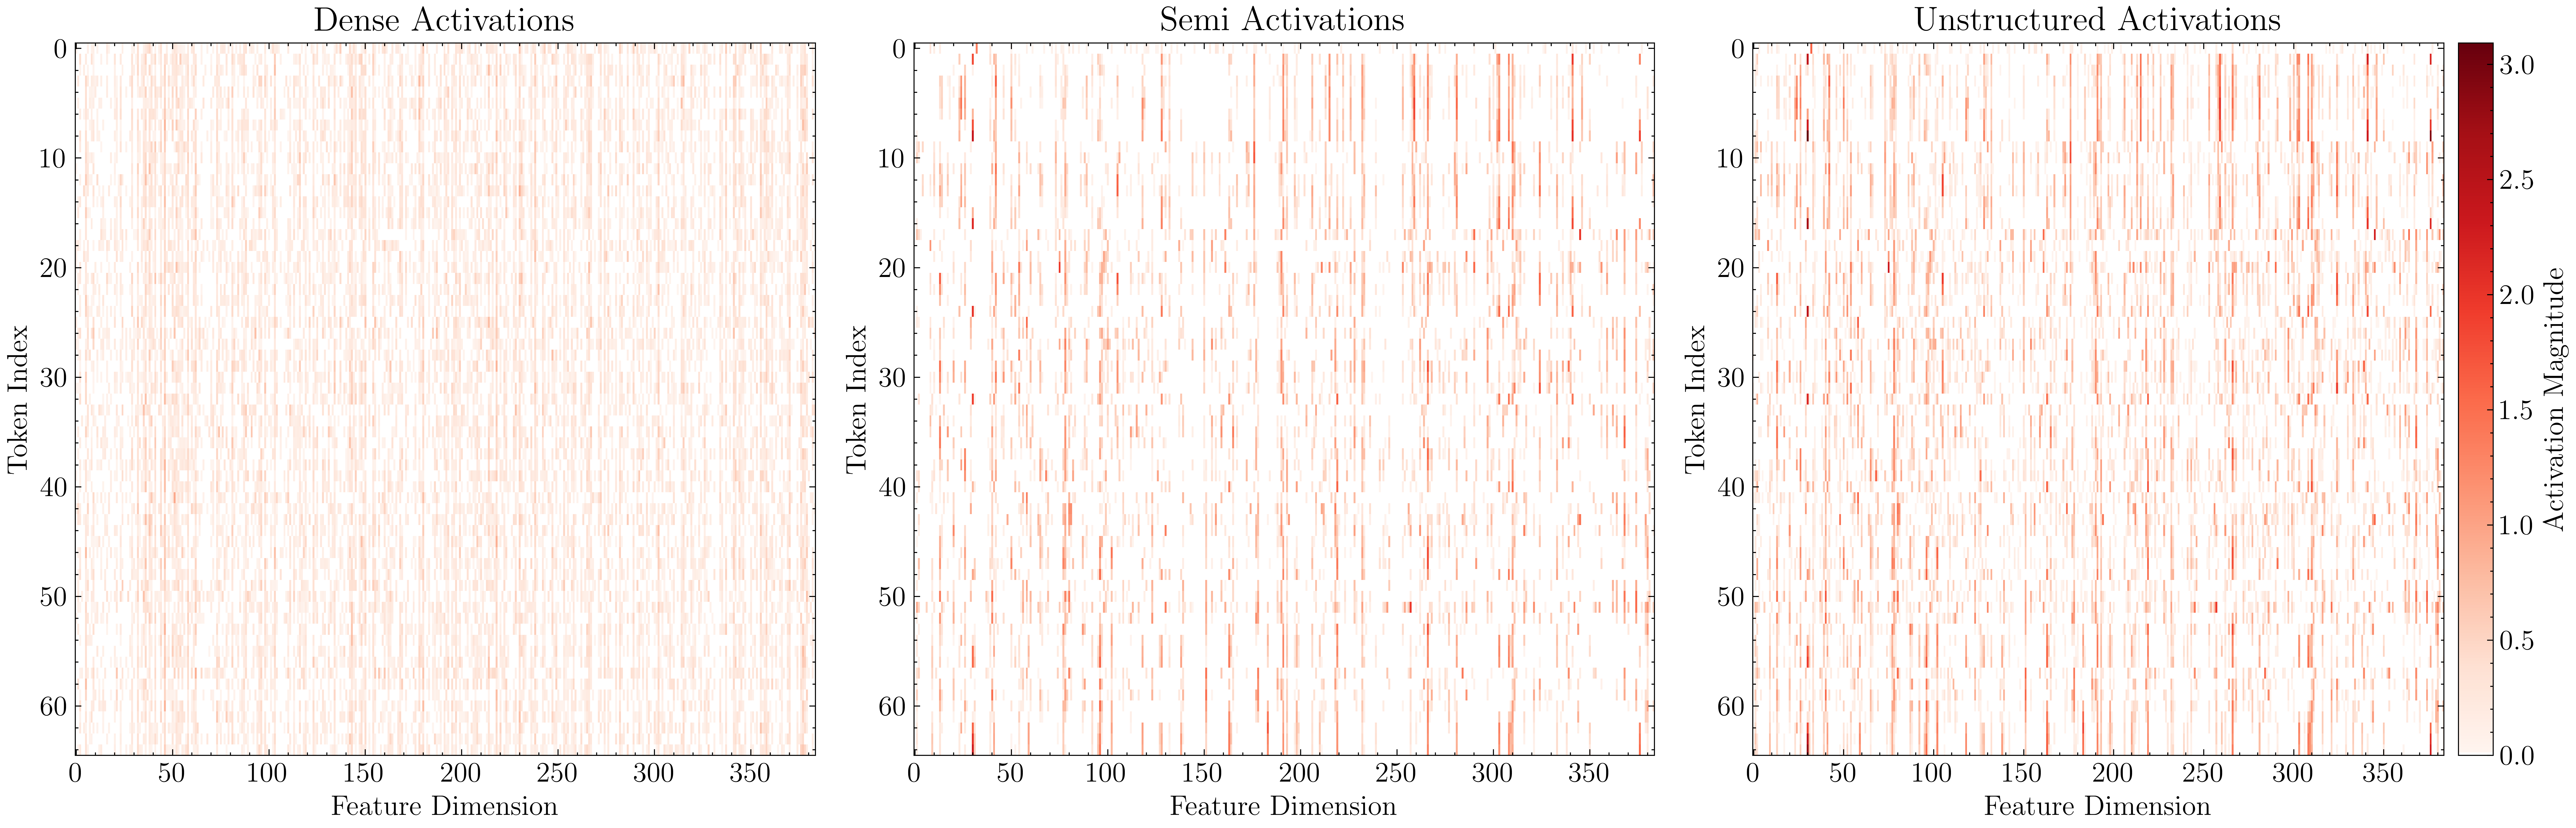

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

with plt.style.context(['science', 'ieee']):
    # Increase font size
    plt.rcParams.update({'font.size': 14})

    layer = layers[1]

    # Extract and convert all tensors to numpy
    dens = dens_acts[layer][0].detach().cpu().numpy()
    semi = semi_acts[layer][0].detach().cpu().numpy()
    unst = unst_acts[layer][0].detach().cpu().numpy()

    # Set consistent min/max for color scale
    vmin = min(dens.min(), semi.min(), unst.min())
    vmax = max(dens.max(), semi.max(), unst.max())

    # Custom Reds colormap starting from white
    reds = cm.get_cmap('Reds', 256)
    new_colors = reds(np.linspace(0, 1, 256))
    new_colors[0] = [1, 1, 1, 1]  # Set lowest to white
    white_reds = mcolors.ListedColormap(new_colors)

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='white')
    for ax in axes:
        ax.set_facecolor('white')

    # Plot Dense Activations
    im0 = axes[0].imshow(dens, aspect='auto', cmap=white_reds, vmin=vmin, vmax=vmax)
    axes[0].set_title('Dense Activations')
    axes[0].set_xlabel('Feature Dimension')
    axes[0].set_ylabel('Token Index')

    # Plot Semi Activations
    im1 = axes[1].imshow(semi, aspect='auto', cmap=white_reds, vmin=vmin, vmax=vmax)
    axes[1].set_title('Semi Activations')
    axes[1].set_xlabel('Feature Dimension')
    axes[1].set_ylabel('Token Index')

    # Plot Unstructured Activations
    im2 = axes[2].imshow(unst, aspect='auto', cmap=white_reds, vmin=vmin, vmax=vmax)
    axes[2].set_title('Unstructured Activations')
    axes[2].set_xlabel('Feature Dimension')
    axes[2].set_ylabel('Token Index')

    # Create a divider to position colorbar to the right of all plots
    divider = make_axes_locatable(axes[2])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(im2, cax=cax)
    cbar.set_label('Activation Magnitude', fontsize=14)

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_104375/3641800753.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reds = cm.get_cmap('Reds', 256)


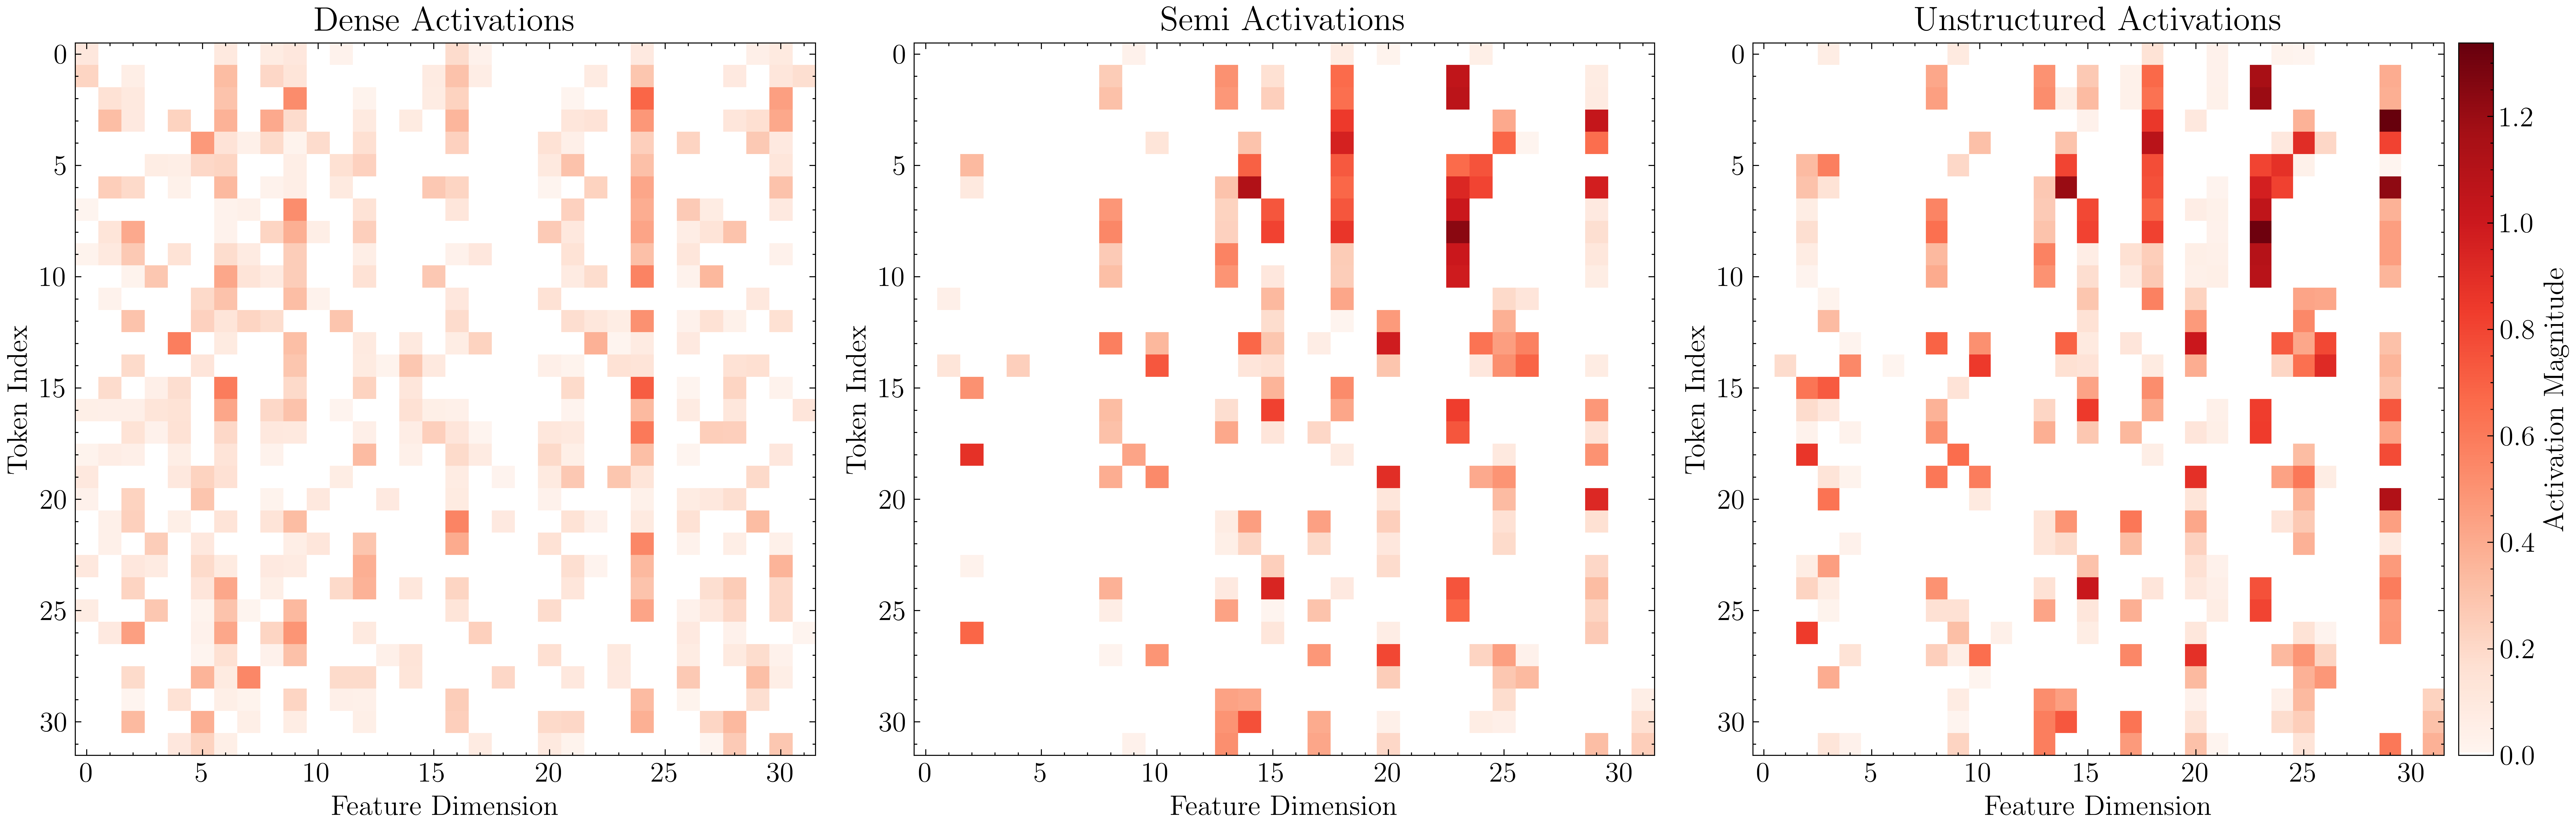

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})

    layer = layers[1]
    i = 1

    # Extract and convert all tensors to numpy
    dens = dens_acts[layer][i].detach().cpu().numpy()
    semi = semi_acts[layer][i].detach().cpu().numpy()
    unst = unst_acts[layer][i].detach().cpu().numpy()

    # Crop to top-left 32x32 region
    dens_crop = dens[:32, :32]
    semi_crop = semi[:32, :32]
    unst_crop = unst[:32, :32]

    # Set consistent min/max for color scale
    vmin = min(dens_crop.min(), semi_crop.min(), unst_crop.min())
    vmax = max(dens_crop.max(), semi_crop.max(), unst_crop.max())

    # Custom Reds colormap starting from white
    reds = cm.get_cmap('Reds', 256)
    new_colors = reds(np.linspace(0, 1, 256))
    new_colors[0] = [1, 1, 1, 1]  # Set lowest to white
    white_reds = mcolors.ListedColormap(new_colors)

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='white')
    for ax in axes:
        ax.set_facecolor('white')

    # Plot Dense Activations
    im0 = axes[0].imshow(dens_crop, aspect='auto', cmap=white_reds, vmin=vmin, vmax=vmax)
    axes[0].set_title('Dense Activations')
    axes[0].set_xlabel('Feature Dimension')
    axes[0].set_ylabel('Token Index')

    # Plot Semi Activations
    im1 = axes[1].imshow(semi_crop, aspect='auto', cmap=white_reds, vmin=vmin, vmax=vmax)
    axes[1].set_title('Semi Activations')
    axes[1].set_xlabel('Feature Dimension')
    axes[1].set_ylabel('Token Index')

    # Plot Unstructured Activations
    im2 = axes[2].imshow(unst_crop, aspect='auto', cmap=white_reds, vmin=vmin, vmax=vmax)
    axes[2].set_title('Unstructured Activations')
    axes[2].set_xlabel('Feature Dimension')
    axes[2].set_ylabel('Token Index')

    # Single shared colorbar on the right
    divider = make_axes_locatable(axes[2])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(im2, cax=cax)
    cbar.set_label('Activation Magnitude', fontsize=14)

    plt.tight_layout()
    plt.show()


In [20]:
layer = layers[1]
dens = dens_acts[layer][0].detach().cpu().numpy()
semi = semi_acts[layer][0].detach().cpu().numpy()
unst = unst_acts[layer][0].detach().cpu().numpy()

In [22]:
dens.shape

(65, 384)

In [24]:
dens = to_sparse_semi_structured(dens)
dense = dens.to_dense()

AttributeError: 'numpy.ndarray' object has no attribute 'is_cuda'